In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('../Datasets/50-Startups.csv')
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,New York,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [17]:
np.unique(df.State)

array(['California', 'New York'], dtype=object)

In [18]:
df_dummies = pd.get_dummies(df, columns=['State'])
df_dummies.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0


In [19]:
df_mlr = df_dummies.iloc[:,[0,1,2,3,5]]
df_mlr.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,State_New York
0,165349.20,136897.80,471784.10,192261.83,1
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,1
4,142107.34,91391.77,366168.42,166187.94,0
5,131876.90,99814.71,362861.36,156991.12,1
6,134615.46,147198.87,127716.82,156122.51,0
7,130298.13,145530.06,323876.68,155752.60,1
8,120542.52,148718.95,311613.29,152211.77,1
9,123334.88,108679.17,304981.62,149759.96,0


In [20]:
import statsmodels.formula.api as smf

smf_mlr = smf.ols(formula = "Profit ~ Q('Marketing Spend') + \
    Administration + Q('R&D Spend') + Q('State_New York')",
                  data = df_mlr).fit()

### or without the dummy dataframe ###
# smf_mlr = smf.ols(formula = "Profit ~ Q('Marketing Spend') + \
#     Administration + Q('R&D Spend') + C(State)",
#                   data = df).fit()

smf_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     218.4
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           7.53e-29
Time:                        00:31:43   Log-Likelihood:                -525.25
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.042e+04   6653.545      7.577      0.000     3.7e+04    6.38e+04
Q('Marketing Spend')     0.0264      0.017      1.581      0.121      -0.007       0.060
Administration          -0.0236      0.052     -0.455      0.651      -0.128       0.081
Q('R&D Spend')           0.8080      0.046     17.662      0.000       0.716       0.900
Q('State_New York')  -1332.0930   2690.180     -0.495      0.623   -6750.393    4086.207
==============================================================================
Omnibus:                       15.851   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.631
Skew:                          -0.951   Prob(JB):                     2.72e-06
Kurtosis:                       5.947   Cond. No.                     1.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Backward Elimination for Feature Selection

For the selection of columns that are going to stay in our model, we're going to use the Backward Elimination, which is a step in the Stepwise Regression, and we're going to use tolerance of `0.05`. Remembering we already created the first model with all variables (including a dummy variable for State = 'New York'), which is stored in the variable `smf_mlr`. We can see that the biggest **p-value** belong to the variable `Administration`. 

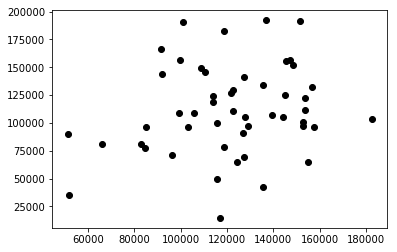

In [23]:
import matplotlib.pyplot as plt

plt.scatter(df_mlr['Administration'], df_mlr['Profit'], color='black')
plt.show();

There doesn't seem to exist a obvious relationship between `Profit` and `Administration`, and that should help to explain the huge **p-value**. Repeating the model without this predictor.

In [24]:
smf_mlr_be1 = smf.ols(formula = "Profit ~ Q('Marketing Spend') + \
                     Q('R&D Spend') + Q('State_New York')",
                  data = df_mlr).fit()
smf_mlr_be1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.2
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           4.44e-30
Time:                        00:32:21   Log-Likelihood:                -525.36
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.772e+04   3018.340     15.811      0.000    4.16e+04    5.38e+04
Q('Marketing Spend')     0.0286      0.016      1.809      0.077      -0.003       0.060
Q('R&D Spend')           0.8003      0.042     18.976      0.000       0.715       0.885
Q('State_New York')  -1484.6097   2646.166     -0.561      0.577   -6811.065    3841.846
==============================================================================
Omnibus:                       15.844   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.957
Skew:                          -0.943   Prob(JB):                     2.31e-06
Kurtosis:                       5.984   Cond. No.                     6.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we should be able to observe that `Q('State_New York')` is the next variable to be removed:

In [25]:
smf_mlr_be2 = smf.ols(formula = "Profit ~ Q('Marketing Spend') + \
                     Q('R&D Spend')",
                  data = df_mlr).fit()
smf_mlr_be2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           2.16e-31
Time:                        00:32:21   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Q('Marketing Spend')     0.0299      0.016      1.927      0.060      -0.001       0.061
Q('R&D Spend')           0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we should be able to observe that `Q('Marketing Spend')` is the next and last variable to be removed:

In [26]:
smf_mlr_be3 = smf.ols(formula = "Profit ~ Q('R&D Spend')",
                  data = df_mlr).fit()
smf_mlr_be3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           3.50e-32
Time:                        00:32:22   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
Q('R&D Spend')     0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

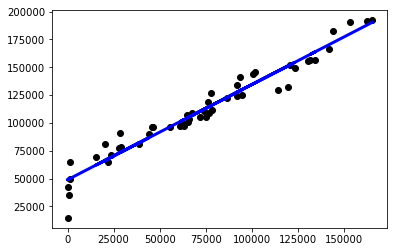

In [27]:
plt.scatter(df_mlr['R&D Spend'], df_mlr['Profit'], color='black')
plt.plot(df_mlr['R&D Spend'], smf_mlr_be3.predict(df_mlr['R&D Spend']), color='blue', linewidth=3)
plt.show();

It seems that `Q('R&D Spend')` is a good predictor by itself, and with last **p-value** lesser than `0.05`, we finished our Backward Elimination. The thing is, `Q('Marketing Spend')` had a particularly interesting **p-value** of `0.06`. Investigating Adjusted R-squared can be a better way to decide for a more robust models.

In [32]:
print("With Q('Marketing Spend'):", smf_mlr_be2.rsquared_adj)
print("Without Q('Marketing Spend'):", smf_mlr_be3.rsquared_adj)

With Q('Marketing Spend'): 0.9483418037498477
Without Q('Marketing Spend'): 0.9454214684987817


The model with `Q('Marketing Spend')` and `Q('R&D Spend')` has a higher Adjusted R-squared, which is a good sign that it may be a more robust model.